# Data Analysis 


### Import necessary libraries

In [9]:
# src directory
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from datetime import datetime

# Import custom modules
from utils.utils import load_data
from data_processing import DataPreprocessing

In [10]:
# Load the datasets
F_data = load_data('C:/Users/HP/10 Acadamy PRojects/New folder (8 & 9)/Ehanced_Fraud_Detection_Ecommerce_Banking/data/raw/Fraud_Data.csv')
credit_card_data = load_data('C:/Users/HP/10 Acadamy PRojects/New folder (8 & 9)/Ehanced_Fraud_Detection_Ecommerce_Banking/data/raw/creditcard.csv')
ip_data = load_data('C:/Users/HP/10 Acadamy PRojects/New folder (8 & 9)/Ehanced_Fraud_Detection_Ecommerce_Banking/data/raw/IpAddress_to_Country.csv')

# Check for missing values 

In [11]:
# Identifying Missing Values
F_data.isnull().sum() / len(F_data)

user_id           0.0
signup_time       0.0
purchase_time     0.0
purchase_value    0.0
device_id         0.0
source            0.0
browser           0.0
sex               0.0
age               0.0
ip_address        0.0
class             0.0
dtype: float64

In [12]:
# Identifying Missing Values
credit_card_data.isnull().sum() / len(credit_card_data)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

In [13]:
# Identifying Missing Values
ip_data.isnull().sum() / len(ip_data)

lower_bound_ip_address    0.0
upper_bound_ip_address    0.0
country                   0.0
dtype: float64

# Data Processing & Analyzing

In [14]:
# Instantiateing
dp_fraud = DataPreprocessing(F_data)
dp_credit = DataPreprocessing(credit_card_data)
dp_ip = DataPreprocessing(ip_data)

In [15]:
# Handle missing values
dp_fraud.handle_missing_values(method='drop')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [16]:
dp_credit.handle_missing_values(method='fill', fill_value=dp_credit.data.mean())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [17]:
dp_ip.handle_missing_values(method='drop')  # or method='fill' with appropriate fill_value

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [18]:
# Remove duplicates
dp_fraud.remove_duplicates()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [19]:
dp_credit.remove_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [20]:
dp_ip.remove_duplicates()

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [21]:
# Correct data types
dp_fraud.correct_data_types()
# Check data types before saving processed data
print("\nData types in F_data before saving:")
print(dp_fraud.data.dtypes)
print("\nData types in credit_card_data before saving processed data:")
print(dp_credit.data.dtypes)
print("\nData types in ip_data before saving processed data:")
print(dp_ip.data.dtypes)


Data types in F_data before saving:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
dtype: object

Data types in credit_card_data before saving processed data:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Am

# Feature Engineering for Fraud Data

In [22]:
# Transaction frequency and velocity
dp_fraud.data['transaction_count'] = dp_fraud.data.groupby('user_id')['purchase_time'].transform('count')
dp_fraud.data['time_since_signup'] = (dp_fraud.data['purchase_time'] - dp_fraud.data['signup_time']).dt.total_seconds()
dp_fraud.data['transaction_velocity'] = dp_fraud.data['purchase_value'] / dp_fraud.data['time_since_signup']
dp_fraud.data['transaction_time_diff'] = (dp_fraud.data['purchase_time'] - dp_fraud.data['signup_time']).dt.total_seconds()

In [23]:
# Extract hour of the day and day of the week from purchase_time
dp_fraud.data['hour_of_day'] = dp_fraud.data['purchase_time'].dt.hour
dp_fraud.data['day_of_week'] = dp_fraud.data['purchase_time'].dt.dayofweek

# Dats_Transformation

In [24]:
# Encode categorical features
categorical_columns = ['source', 'browser', 'sex',]
dp_fraud.encode_categorical(categorical_columns)

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,transaction_count,time_since_signup,...,transaction_time_diff,hour_of_day,day_of_week,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,39,7.327584e+08,0,1,4506682.0,...,4506682.0,2,5,False,True,False,False,False,False,True
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,53,3.503114e+08,0,1,17944.0,...,17944.0,1,0,False,False,False,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,53,2.621474e+09,1,1,1.0,...,1.0,18,3,False,True,False,False,True,False,True
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,41,3.840542e+09,0,1,492085.0,...,492085.0,13,0,False,True,False,False,False,True,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,45,4.155831e+08,0,1,4361461.0,...,4361461.0,18,2,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,28,3.451155e+09,1,1,5261233.0,...,5261233.0,0,6,False,True,False,False,False,False,True
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,32,2.439047e+09,0,1,931270.0,...,931270.0,12,1,False,True,False,False,False,True,True
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,26,2.748471e+09,0,1,6681616.0,...,6681616.0,7,2,False,True,False,True,False,False,False
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,37,3.601175e+09,0,1,5146119.0,...,5146119.0,9,0,False,True,False,False,False,False,True


In [25]:
# Normalize and scale numerical features
numerical_features = ['purchase_value', 'transaction_count', 'age', 'transaction_time_diff', 'transaction_velocity', 'hour_of_day', 'day_of_week']
dp_fraud.normalize_and_scale(numerical_features)

,user_id,signup_time,purchase_time,purchase_value,device_id,age,ip_address,class,transaction_count,time_since_signup,...,transaction_time_diff,hour_of_day,day_of_week,source_Direct,source_SEO,browser_FireFox,browser_IE,browser_Opera,browser_Safari,sex_M
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,-0.160204,QVPSPJUOCKZAR,0.679914,7.327584e+08,0,0.0,4506682.0,...,-0.136057,-1.377455,0.991020,False,True,False,False,False,False,True
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,-1.142592,EOGFQPIZPYXFZ,2.304476,3.503114e+08,0,0.0,17944.0,...,-1.571877,-1.522122,-1.501259,False,False,False,False,False,False,False
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,-1.197169,YSSKYOSJHPPLJ,2.304476,2.621474e+09,1,0.0,1.0,...,-1.577617,0.937208,-0.005891,False,True,False,False,True,False,True
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,0.385567,ATGTXKYKUDUQN,0.911994,3.840542e+09,0,0.0,492085.0,...,-1.420213,0.213876,-1.501259,False,True,False,False,False,True,True
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,0.112681,NAUITBZFJKHWW,1.376155,4.155831e+08,0,0.0,4361461.0,...,-0.182509,0.937208,-0.504347,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,0.330990,XPSKTWGPWINLR,-0.596528,3.451155e+09,1,0.0,5261233.0,...,0.105303,-1.666788,1.489476,False,True,False,False,False,False,True
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,-0.105627,LYSFABUCPCGBA,-0.132367,2.439047e+09,0,0.0,931270.0,...,-1.279730,0.069209,-1.002803,False,True,False,False,False,True,True
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,0.167258,MEQHCSJUBRBFE,-0.828608,2.748471e+09,0,0.0,6681616.0,...,0.559643,-0.654123,-0.504347,False,True,False,True,False,False,False
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,0.494721,CMCXFGRHYSTVJ,0.447833,3.601175e+09,0,0.0,5146119.0,...,0.068481,-0.364790,-1.501259,False,True,False,False,False,False,True


C:\Users\HP\AppData\Local\Temp\ipykernel_29416\3080355149.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_country_counts.values, y=top_country_counts.index, palette='magma')


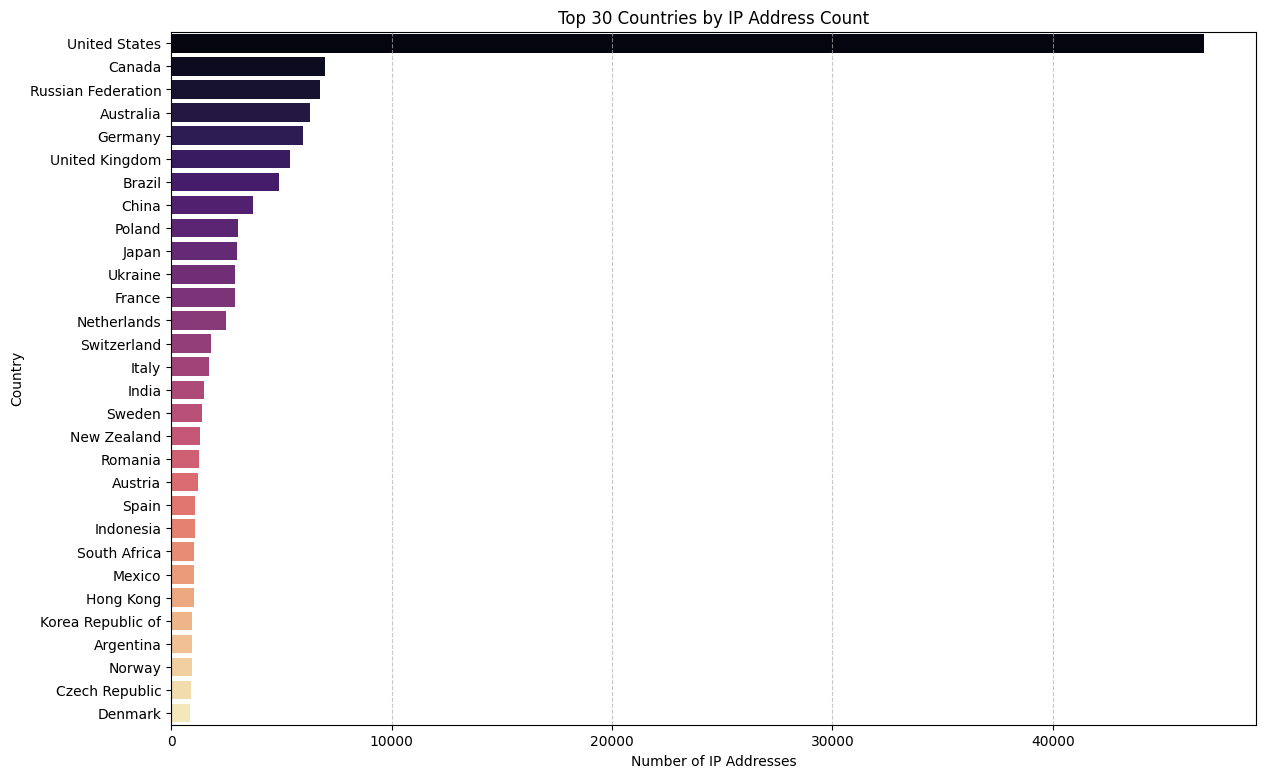

In [26]:
# Visualize top 30 countries by IP address count
top_n = 30
top_country_counts = ip_data['country'].value_counts().head(top_n)
plt.figure(figsize=(14, 9))  # Slightly larger figure for better readability
sns.barplot(x=top_country_counts.values, y=top_country_counts.index, palette='magma')
plt.title(f'Top {top_n} Countries by IP Address Count')
plt.xlabel('Number of IP Addresses')
plt.ylabel('Country')
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Horizontal grid lines 
plt.show()


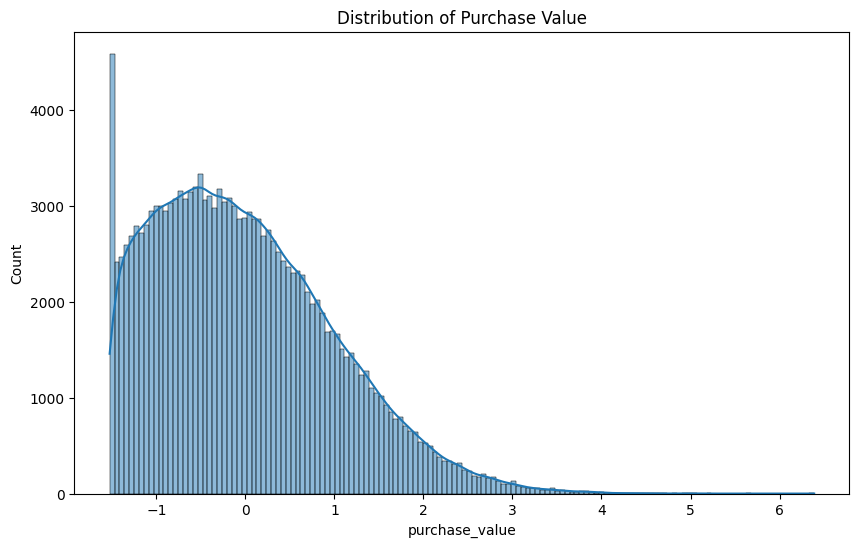

In [27]:
# Univariate analysis for fraud_data
plt.figure(figsize=(10, 6))
sns.histplot(dp_fraud.data['purchase_value'], kde=True)
plt.title('Distribution of Purchase Value')
plt.show()

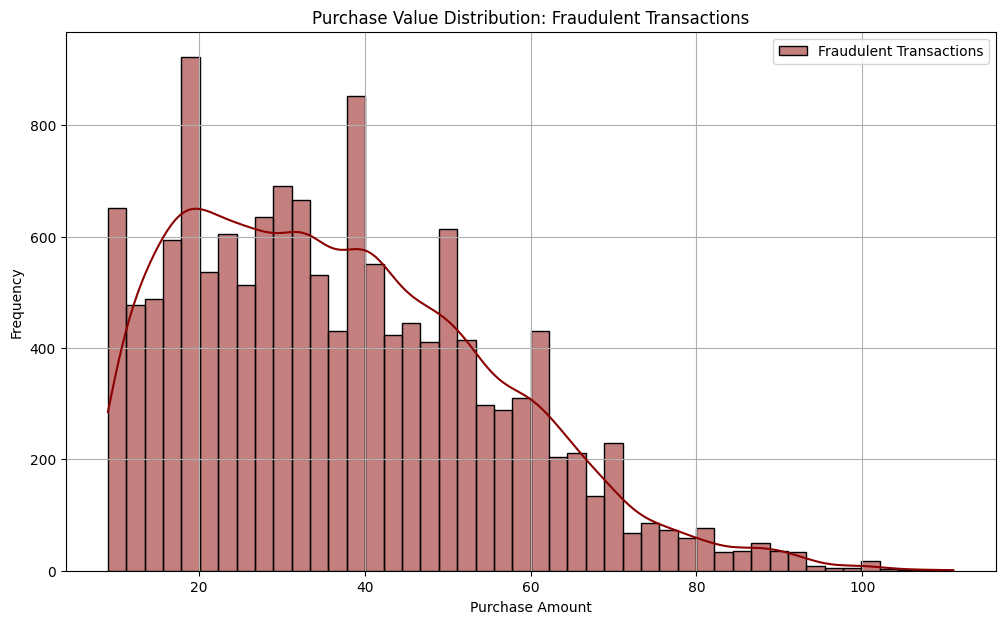

In [28]:
# Analyze purchase value distribution for fraudulent transactions
plt.figure(figsize=(12, 7))  
fraudulent_purchases = F_data[F_data['class'] == 1]['purchase_value']
sns.histplot(fraudulent_purchases, kde=True, color='darkred', label='Fraudulent Transactions')
plt.title('Purchase Value Distribution: Fraudulent Transactions')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)  #Grid for easier reading
plt.show()


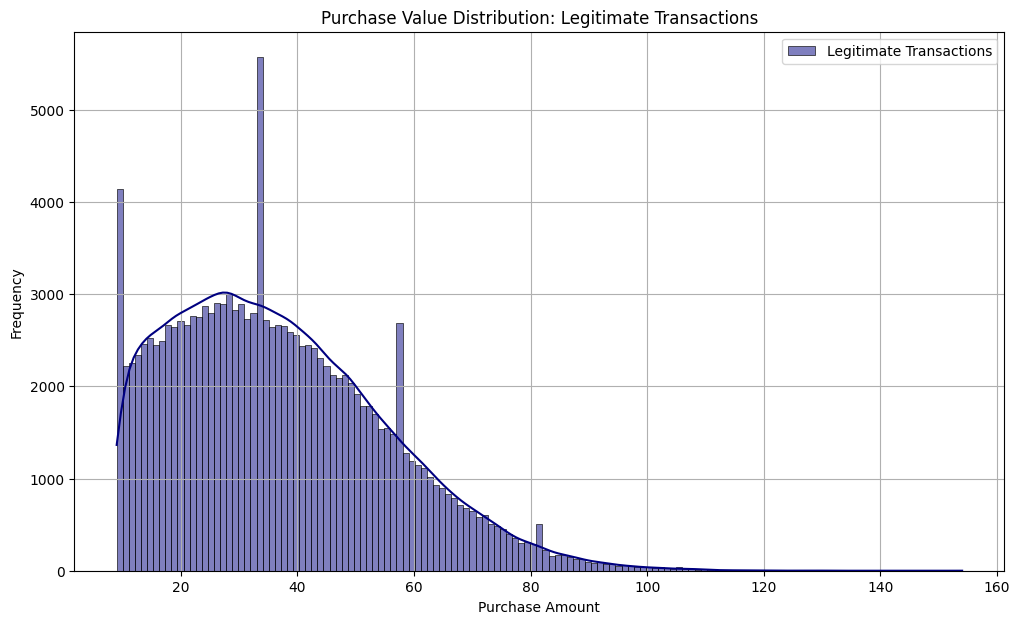

In [29]:
# Analyze purchase value distribution for legitimate transactions
plt.figure(figsize=(12, 7))  
# Filter data for non-fraudulent cases
legit_purchases = F_data[F_data['class'] == 0]['purchase_value']
sns.histplot(legit_purchases, kde=True, color='navy', label='Legitimate Transactions')
plt.title('Purchase Value Distribution: Legitimate Transactions')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)  # Added grid for clarity
plt.show()


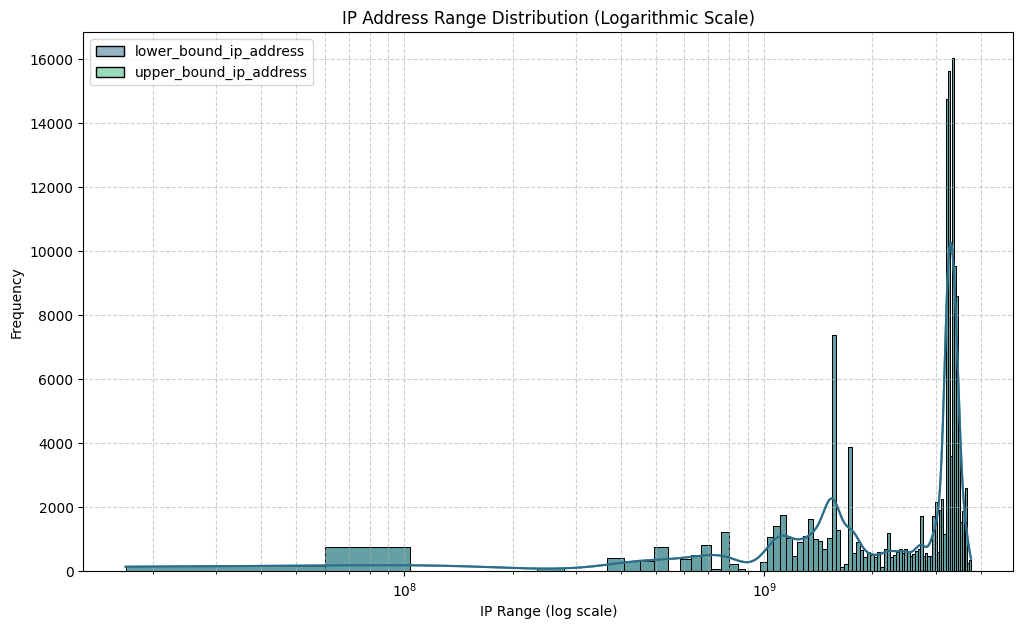

In [30]:
# Visualize distribution of IP address ranges with log scale
plt.figure(figsize=(12, 7))  
# Plot histogram with KDE for lower and upper bound IP addresses
sns.histplot(ip_data[['lower_bound_ip_address', 'upper_bound_ip_address']], kde=True, palette='viridis')
plt.xscale('log')  # Logarithmic scale for better visualization of range spread
plt.title('IP Address Range Distribution (Logarithmic Scale)')
plt.xlabel('IP Range (log scale)')
plt.ylabel('Frequency')
plt.grid(True, which='both', linestyle='--', alpha=0.6)  # Grid for major and minor ticks
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_29416\3106022328.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='purchase_value', data=dp_fraud.data, palette=['#FF6347', '#4682B4'])  # Custom colors for classes


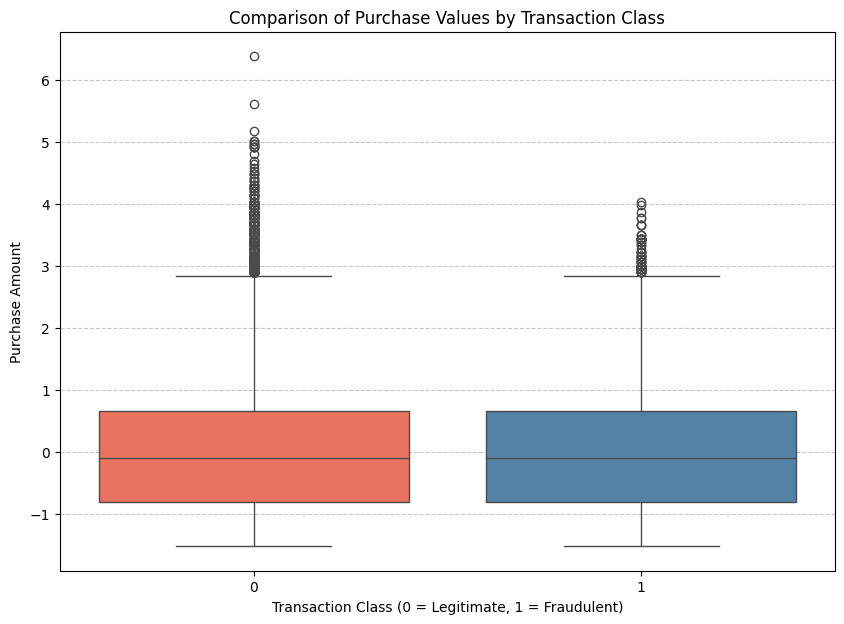

In [31]:
# Boxplot showing purchase value across transaction classes
plt.figure(figsize=(10, 7))  
sns.boxplot(x='class', y='purchase_value', data=dp_fraud.data, palette=['#FF6347', '#4682B4'])  # Custom colors for classes
plt.title('Comparison of Purchase Values by Transaction Class')
plt.xlabel('Transaction Class (0 = Legitimate, 1 = Fraudulent)')
plt.ylabel('Purchase Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Added horizontal grid lines for readability
plt.show()


# Save the processed data

In [ ]:

dp_fraud.data.to_csv('../data/processed/cleaned_fraud_data_by_country.csv', index=False)
dp_credit.data.to_csv('../data/processed/cleaned_credit_card_data.csv', index=False)